<a href="https://colab.research.google.com/github/jin-raii/Garbage-Classifier-/blob/master/garbage_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Dataset from Kaggle




In [1]:
import kagglehub

In [2]:
path = kagglehub.dataset_download("mostafaabla/garbage-classification")
path

100%|██████████| 239M/239M [00:01<00:00, 179MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/mostafaabla/garbage-classification/versions/1'

### Move downloaded dataset to Google Drive

In [3]:
import shutil

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
shutil.move(path, '/content/drive/MyDrive/garbage-classification')

'/content/drive/MyDrive/garbage-classification'

### Load Garbage Dataset

In [8]:
import os

In [27]:
dataset_path ='/content/drive/MyDrive/garbage-classification/garbage_classification'
dataset_folder = os.listdir(dataset_path)

label = []
n_samples = []
total_data = []
for folder in dataset_folder:
  print(f'{folder} : {len(os.listdir(os.path.join(dataset_path, folder)))}')
  label.append(folder)
  n_samples.append(len(os.listdir(os.path.join(dataset_path, folder))))
  total_data.append(len(os.listdir(os.path.join(dataset_path, folder))))
  # print(f'sample image : {os.listdir(os.path.join(dataset_path, folder))[0]}')

print('total dataset count: ', sum(total_data))

clothes : 5325
plastic : 865
shoes : 1977
trash : 697
brown-glass : 607
paper : 1050
metal : 769
white-glass : 775
battery : 945
biological : 985
green-glass : 629
cardboard : 891
total dataset count:  15515


### Visualize class distribution

In [22]:
import matplotlib.pyplot as plt


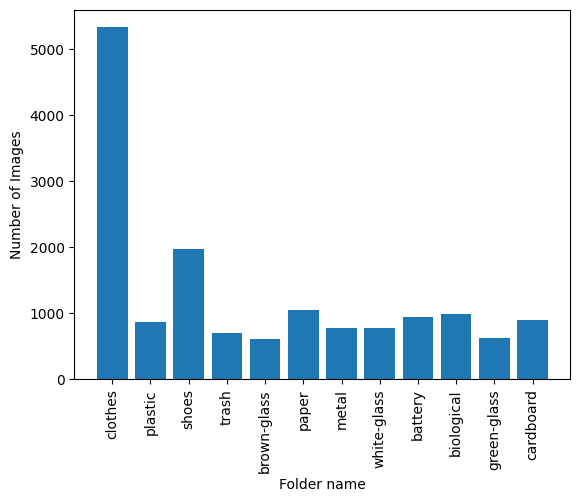

In [31]:
plt.bar(label, n_samples)
plt.xticks(rotation=90)
plt.xlabel('Folder name')
plt.ylabel('Number of Images')
plt.show()


### Image Augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2

)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [35]:
train_generator.class_indices

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [21]:
value_mapping = {
    'clothes': 'recyclable',
    'plastic': 'non-recyclable',
    'shoes': 'recyclable',
    'trash': 'non-recyclable',
    'brown-glass': 'non-recyclable',
    'paper': 'non-recyclable',
    'metal': 'non-recyclable',
    'white-glass': 'non-recyclable',
    'battery': 'non-recyclable',
    'biological': 'non-recyclable',
    'green-glass': 'non-recyclable',
    'cardboard': 'non-recyclable'
}
value_mapping.values()

dict_values(['recyclable', 'non-recyclable', 'recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable', 'non-recyclable'])